# k-evolution test notebook - implementing IC from class

In [42]:
import numpy as np
# import MAS_library as MASL
# import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
# import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 30).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
import scipy.signal as sig
# from scipy.ndimage import gaussian_filter1

# Nested dictionary

In [43]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)

## Background

In [44]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a

In [45]:
redshifts = [100.0, 50.0, 30.0, 0.0]


address_kev = "./../output/"
for i in range(np.shape(redshifts)[0]):
    data['Nbody']['pow_phi']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_phi.dat")
    data['Nbody']['pow_cdm']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_delta.dat")
#     data['kev_old']['pow_ncdm']['z='+str(redshifts[i])] = np.loadtxt(address_kev_old+"data_pk_"+str(i).zfill(3)+"_deltancdm.dat")
#     data['Nbody']['pow_B']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_B.dat")
    data['Nbody']['pow_pk']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_pi_k.dat")
    data['Nbody']['pow_zeta']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_zeta.dat")
#     data['Nbody']['pow_delta_kess']['z='+str(redshifts[i])] = np.loadtxt(address_kev+"EFT_pk"+str(i).zfill(3)+"_delta_kess.dat")
data['Nbody']['bg'] = np.loadtxt(address_kev+"EFT_background.dat")


address_hiclass = "./../../hi_class_pub_devel/output/"

for i in range(np.shape(redshifts)[0]):
    data['class']['tk']['z='+str(redshifts[i])] = np.loadtxt(address_hiclass+"kgb_hiclass_z"+str(i+1)+"_tk.dat")

data['class']['bg'] = np.loadtxt(address_hiclass+"kgb_hiclass_background.dat")


# Background test

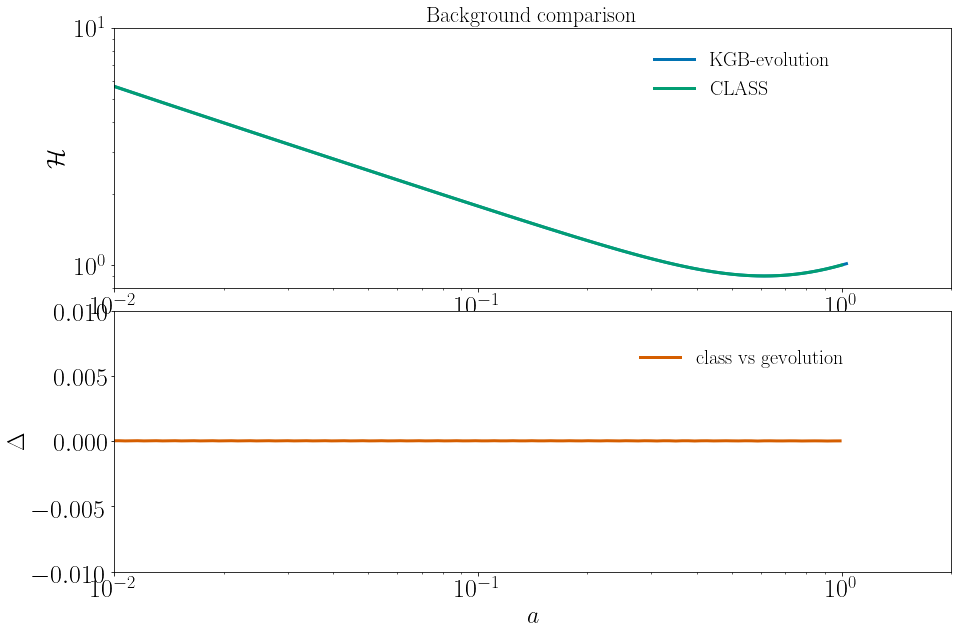

In [46]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,10),nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.09)
l=0
file_gev = data['Nbody']['bg']
f_gev = interpolate.interp1d(file_gev[:,2],file_gev[:,3])
axs[0].loglog(file_gev[:,2],file_gev[:,3],"-",color =Colors[l], lw=3,label="KGB-evolution")

file_class = data['class']['bg']
z = file_class[:,0]
a = 1./(1. + z )
H_class = interpolate.interp1d(a, file_class[:,3])

axs[0].loglog(a,file_class[:,3]*a*f_gev(1)/H_class(1),"-",color =Colors[l+2], lw=3,label="CLASS")

axs[0].set_ylabel(r'$\mathcal{H}$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(0.8,1.e1)
axs[0].set_xlim(1.e-2,2.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title("Background comparison", fontsize=22)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)



l=0
file_gev = data['Nbody']['bg']

num = np.shape(file_gev[:,2])[0]-1
a  = file_gev[:num,2]
file_class = H_class(a)*a*f_gev(1)/H_class(1)
axs[1].plot(a,np.abs(file_class-file_gev[:num,3])/file_gev[:num,3],"-",color =Colors[l+3], lw=3,label="class vs gevolution")

axs[1].set_ylabel(r'$\Delta$',fontsize=24)
axs[1].set_xlabel('$a$',fontsize=24)
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].set_ylim(-0.01,0.01)
axs[1].set_xlim(1.e-2,2.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[1].set_title("Background comparison", fontsize=22)
axs[1].legend(fontsize=20,bbox_to_anchor=[0.75,0.82],loc="center",frameon=False)


# pi_k power spectrum

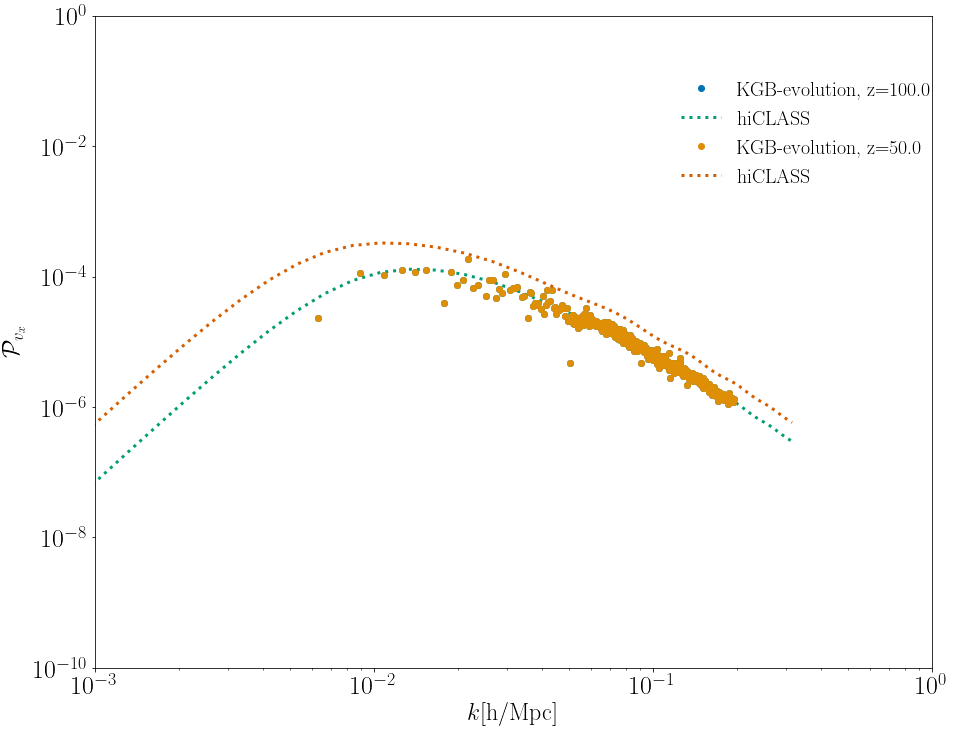

In [51]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,12),nrows=1, ncols=1)
# plt.subplots_adjust(hspace=0.0)
l=0
kind = 'pow_pk'

Normlization=As*(data['class']['tk']['z='+str(100.0)][:,0]/kp)**(ns-1.);

for redshift in [100.0, 50.0]:#, 50.0, 30.0]:
    file = data['Nbody'][kind]['z='+str(redshift)]
    axs.loglog(file[:,0],file[:,1],"o",color =Colors[l], lw=3,label="KGB-evolution, " + 'z='+str(redshift))
    
    file = data['class']['tk']['z='+str(redshift)]
    delta_cdm = file[:,5]#/H_class(1.0)**2
    k = file[:,0]
    power = delta_cdm**2 * (Normlization)
    axs.loglog(k,power,":",color =Colors[l+2], lw=3,label="hiCLASS")
    l=l+1

axs.set_ylabel(r'$\mathcal{P} _{{v_x}}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-10,1.e0)
axs.set_xlim(1.e-3,1.)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.85,0.82],loc="center",frameon=False)



### test

In [113]:
file = data['class']['tk']['z='+str(100.0)]
v_x = file[:,5]
v_x_p = file[:,6]
k = file[:,0]
# power = 1.0 * Normlization  #delta_cdm**2 * (Normlization)
v_x_smg_class = interpolate.interp1d(k ,v_x)
v_x_smg_p_class = interpolate.interp1d(k ,v_x_p)


In [116]:
k = 0.000210437;
print(v_x_smg_class(k),v_x_smg_p_class(k))

0.10879089777047946 0.00021567810613279924


In [117]:
file = data['class']['tk']['z='+str(100.0)]
v_x = file[:,2]
v_x_p = file[:,17]
k = file[:,0]
# power = 1.0 * Normlization  #delta_cdm**2 * (Normlization)
v_x_smg_class = interpolate.interp1d(k ,v_x)
v_x_smg_p_class = interpolate.interp1d(k ,v_x_p)


In [118]:
k = 0.179716;
print(v_x_smg_class(k),v_x_smg_p_class(k))

-172.5164335267034 -0.012694823938059817


# zeta power

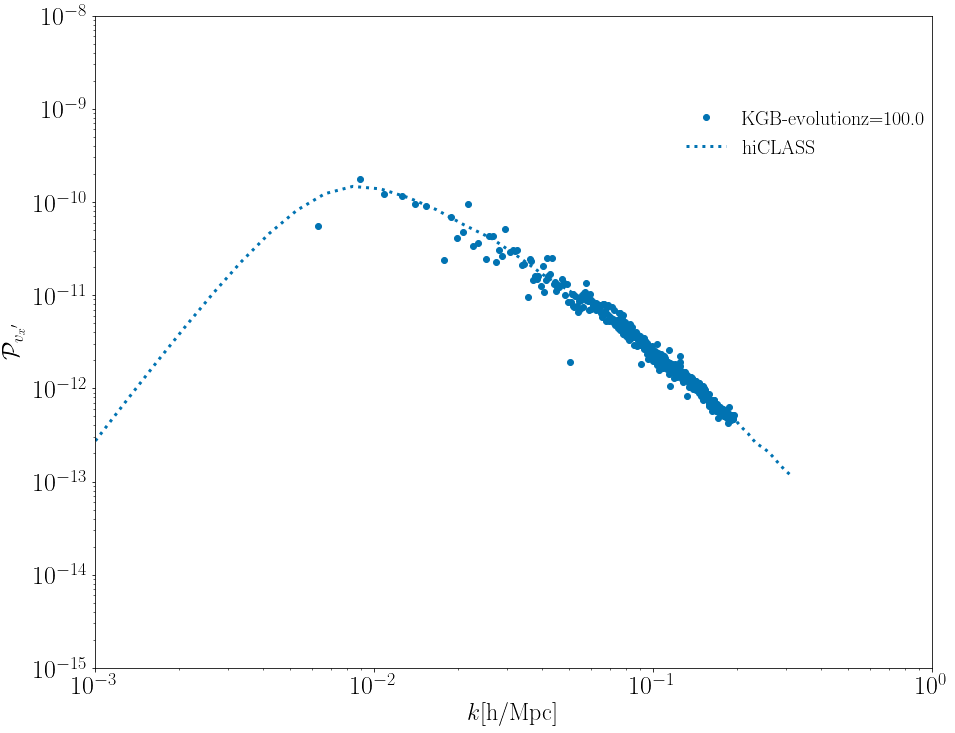

In [49]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,12),nrows=1, ncols=1)
# plt.subplots_adjust(hspace=0.0)
l=0
kind = 'pow_zeta'

Normlization=As*(data['class']['tk']['z='+str(100.0)][:,0]/kp)**(ns-1.);

for redshift in [100.0]:#, 50.0, 30.0]:
    file = data['Nbody'][kind]['z='+str(redshift)] 
    axs.loglog(file[:,0],file[:,1],"o",color =Colors[l], lw=3,label="KGB-evolution" + 'z='+str(redshift))
    
    file = data['class']['tk']['z='+str(redshift)]
    delta_cdm = file[:,6]#/H_class(1.0)**2
    k = file[:,0]
    power = delta_cdm**2 * (Normlization)
    axs.loglog(k,power,":",color =Colors[l], lw=3,label="hiCLASS")
    l=l+1

axs.set_ylabel(r'$\mathcal{P} _{{v_x}^{\prime}}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-15,1.e-8)
axs.set_xlim(1.e-3,1.)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.85,0.82],loc="center",frameon=False)



# Matter power spectrum CHECK

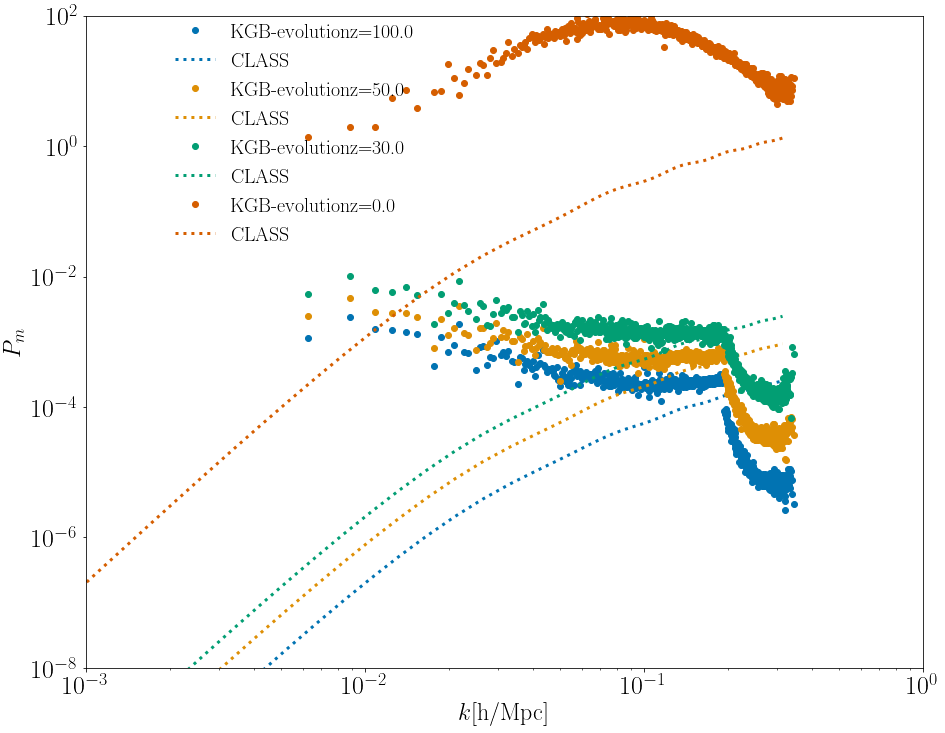

In [39]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,12),nrows=1, ncols=1)
# plt.subplots_adjust(hspace=0.0)
l=0
kind = 'pow_cdm'

Normlization=As*(data['class']['tk']['z='+str(100.0)][:,0]/kp)**(ns-1.);

for redshift in [100.0, 50.0, 30.0,0.0]:
    file = data['Nbody'][kind]['z='+str(redshift)] 
    axs.loglog(file[:,0],file[:,1],"o",color =Colors[l], lw=3,label="KGB-evolution" + 'z='+str(redshift))
    
    file = data['class']['tk']['z='+str(redshift)]
    delta_cdm = file[:,3]
    k = file[:,0]
    power = delta_cdm**2 * (Normlization)
    axs.loglog(k,power,":",color =Colors[l], lw=3,label="CLASS")
    l=l+1

axs.set_ylabel(r'$P_m$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-8,100)
axs.set_xlim(1.e-3,1.)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs.set_title("Background comparison"|, fontsize=22)

axs.legend(fontsize=20,bbox_to_anchor=[0.25,0.82],loc="center",frameon=False)



# Potential power spectrum

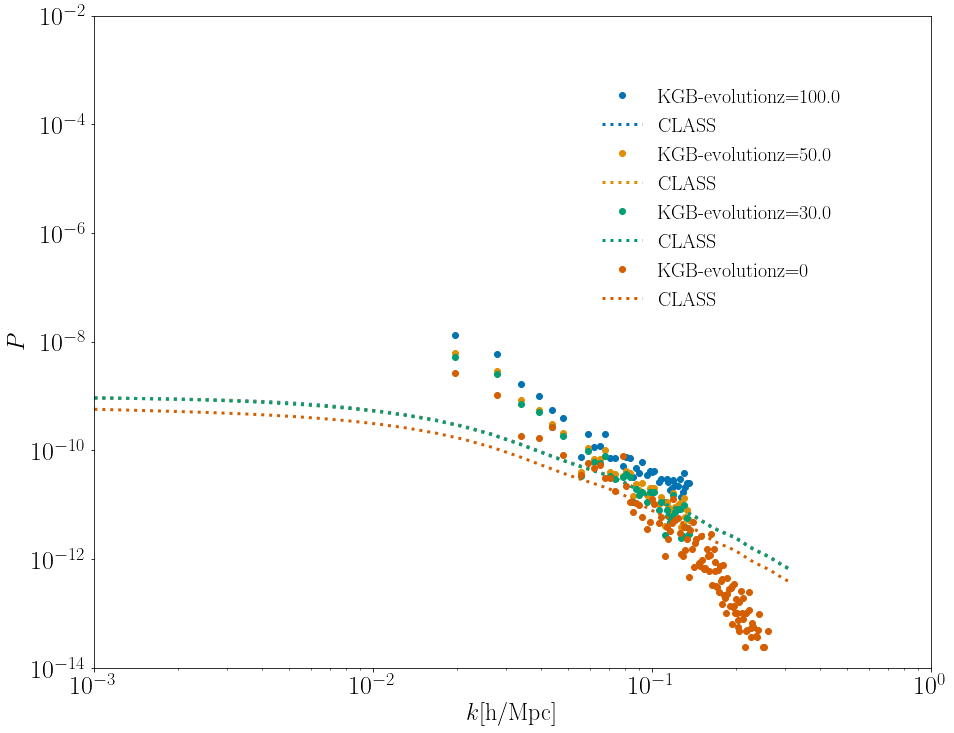

In [24]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,12),nrows=1, ncols=1)
# plt.subplots_adjust(hspace=0.0)
l=0
kind = 'pow_phi'

Normlization=As*(data['class']['tk']['z='+str(100.0)][:,0]/kp)**(ns-1.);

for redshift in [100.0, 50.0, 30.0,0]:
    file = data['Nbody'][kind]['z='+str(redshift)] 
    axs.loglog(file[:,0],file[:,1],"o",color =Colors[l], lw=3,label="KGB-evolution" + 'z='+str(redshift))
    
    file = data['class']['tk']['z='+str(redshift)]
    delta_cdm = file[:,9]
    k = file[:,0]
    power = delta_cdm**2 * (Normlization)
    axs.loglog(k,power,":",color =Colors[l], lw=3,label="CLASS")
    l=l+1

axs.set_ylabel(r'$P$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(1.e-14,1.e-2)
axs.set_xlim(1.e-3,1.)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs.set_title("Background comparison", fontsize=22)
axs.legend(fontsize=20,bbox_to_anchor=[0.75,0.72],loc="center",frameon=False)



# B power spectrum

In [60]:
# # plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# matplotlib.rc('font', **font)
# fig, axs = plt.subplots(figsize=(15,20),nrows=2, ncols=1,gridspec_kw={'height_ratios': [1, 3]})
# plt.subplots_adjust(hspace=0.09)
# l=0
# kind = 'pow_B'
# for redshift in [100, 1 ,0.01]:
# #     file = data['gev'][kind]['z='+str(redshift)] 
# #     axs[0].loglog(file[:,0],file[:,1],"-",color =Colors[l], lw=3,label="gevolution" + 'z='+str(redshift))

#     file = data['kev'][kind]['z='+str(redshift)] 
#     axs[0].loglog(file[:,0],file[:,1],"o",color =Colors[l+1], lw=3,label="kevolution")

#     file = data['kev_file'][kind]['z='+str(redshift)] 
#     axs[0].loglog(file[:,0],file[:,1],"-",color =Colors[l+2], lw=3,label="kevolution file")
#     l=l+3

# axs[0].set_ylabel(r'$P_{\Phi}$',fontsize=24)
# # axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# axs[0].set_xscale('log')
# axs[0].set_yscale('log')
# # axs[0].set_ylim(0.8,1.e1)
# axs[0].set_xlim(1.e-3,1.e-1)
# # axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[0].set_title("Background comparison", fontsize=22)
# axs[0].legend(fontsize=18,bbox_to_anchor=[0.95,0.82],loc="center",frameon=False)


# l=0
# for redshift in [100, 6,1,0.01]:
# #     print(redshift)
#     k = data['gev'][kind]['z='+str(redshift)] [:,0]
#     file_gev = data['gev'][kind]['z='+str(redshift)] [:,1]
#     # axs[1].loglog(file[:,2],file[:,3],"-",color =Colors[l], lw=3,label="gevolution")
#     file_kev_old = data['kev_file'][kind]['z='+str(redshift)][:,1]

#     file_kev = data['kev'][kind]['z='+str(redshift)][:,1]
#     axs[1].plot(k,np.abs(file_kev-file_kev_old)/file_kev_old,"-",color =Colors[l+1], lw=3,label="kev-kev file "+ ', z='+str(redshift))

#     axs[1].plot(file[:,2],np.abs(file_kev_old-file_gev)/file_gev,"o",markersize=10,color =Colors[l+2], lw=3,label="kev-file vs gev"+ ', z='+str(redshift))
#     l=l+3

# axs[1].set_ylabel(r'$\Delta$',fontsize=24)
# axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
# axs[1].set_xscale('log')
# # axs[1].set_yscale('log')
# axs[1].set_ylim(-0.01,0.2)
# axs[1].set_xlim(1.e-3,1.e0)
# # axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# # axs[1].set_title("Background comparison", fontsize=22)
# axs[1].legend(fontsize=20,bbox_to_anchor=[0.5,0.82],ncol=3,loc="center",frameon=False)


# delta kess

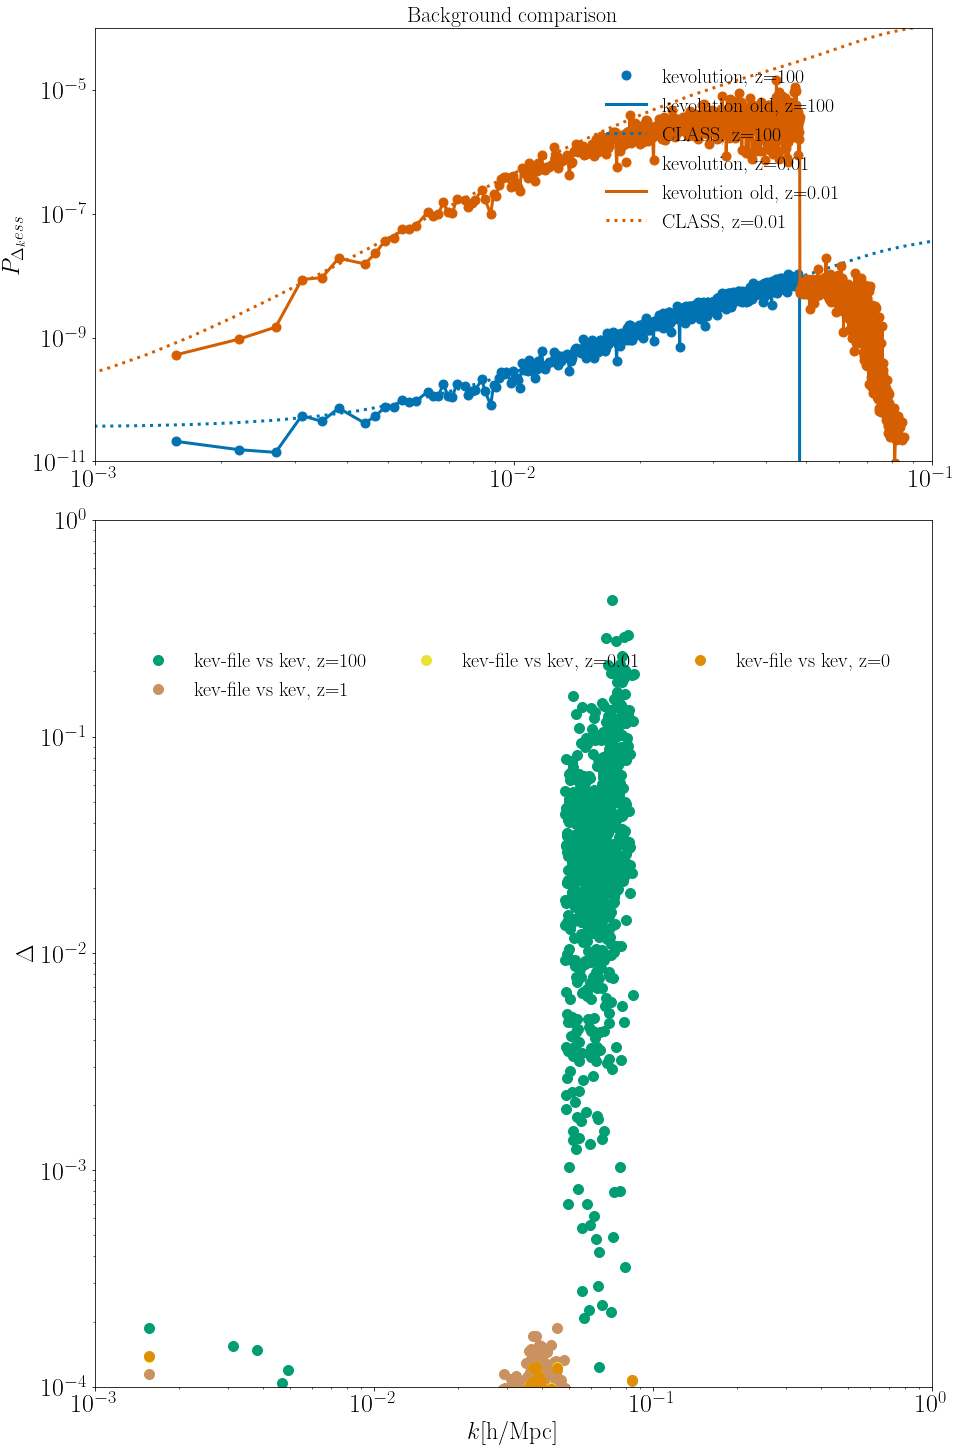

In [62]:
# plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,25),nrows=2, ncols=1,gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.09)
l=0
kind = 'pow_delta_kess'
Normlization=As*(data['class']['tk']['z='+str(100)][:,0]/kp)**(ns-1.);

for redshift in [100,0.01]:
#     file = data['gev'][kind]['z='+str(redshift)] 
#     k = file[:,0]
#     axs[0].loglog(k,file[:,1],"-",color =Colors[l], lw=3,label="gevolution" + 'z='+str(redshift))

    file = data['kev'][kind]['z='+str(redshift)] 
    axs[0].loglog(file[:,0],file[:,1],"o",markersize = 9, color =Colors[l], lw=3,label="kevolution"+ ', z='+str(redshift))

    file = data['kev_old'][kind]['z='+str(redshift)] 
    axs[0].loglog(file[:,0],file[:,1],"-",color =Colors[l], lw=3,label="kevolution old"+ ', z='+str(redshift))
    
    file = data['class']['tk']['z='+str(redshift)]
    delta = file[:,4]
    k = file[:,0]
    power = delta**2 * (Normlization)
    axs[0].loglog(k,power,":",color =Colors[l], lw=3,label="CLASS"+ ', z='+str(redshift))
    
    l=l+3

axs[0].set_ylabel(r'$P_{\Delta_kess}$',fontsize=24)
# axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1.e-11,1.e-4)
axs[0].set_xlim(1.e-3,1.e-1)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
axs[0].set_title("Background comparison", fontsize=22)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.75,0.72],loc="center",frameon=False)


l=0
for redshift in [100,1,0.01,0]:
#     print(redshift)
    k = data['gev'][kind]['z='+str(redshift)][:,0]
#     file_gev = data['gev'][kind]['z='+str(redshift)][:,1]
    # axs[1].loglog(file[:,2],file[:,3],"-",color =Colors[l], lw=3,label="gevolution")
    
    
    
    file_kev = data['kev'][kind]['z='+str(redshift)][:,1]
#     axs[1].plot(k,np.abs(file_kev-file_gev)/file_gev,"-",color =Colors[l+1], lw=3,label="kev-gev"+ ', z='+str(redshift))

    
#     file = data['class']['tk']['z='+str(redshift)]
#     delta = file[:,4]
#     k_class = file[:,0]
#     power = delta**2 * (Normlization)
#     f_kess_class = interpolate.interp1d(k_class, power)
#     file_class = f_kess_class(k)
#     axs[1].plot(k,np.abs(file_class-file_kev)/file_kev,":",color =Colors[l+3], lw=3,label="class-kev"+ ', z='+str(redshift))


    file_kev_old = data['kev_file'][kind]['z='+str(redshift)][:,1]
    axs[1].plot(k,np.abs(file_kev_old-file_kev)/(2.0 * (file_kev+ file_kev_old)),"o",markersize=10,color =Colors[l+2], lw=3,label="kev-file vs kev"+ ', z='+str(redshift))
    l=l+3

axs[1].set_ylabel(r'$\Delta$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-4,1)
axs[1].set_xlim(1.e-3,1.e0)
# axs.legend(fontsize=16,bbox_to_anchor=(0.50,0.53))
# axs[1].set_title("Background comparison", fontsize=22)
axs[1].legend(fontsize=20,bbox_to_anchor=[0.5,0.82],ncol=3,loc="center",frameon=False)


## Numerical check

In [20]:
kind = 'pow_zeta'
for redshift in redshifts:

#     k = data['gev'][kind]['z='+str(redshift)] [:,0]
#     file_gev = data['gev'][kind]['z='+str(redshift)] [:,1]
    # axs[1].loglog(file[:,2],file[:,3],"-",color =Colors[l], lw=3,label="gevolution")

    file_kev = data['kev'][kind]['z='+str(redshift)][:,1]
    axs[1].plot(k,np.abs(file_kev-file_gev)/file_gev,"-",color =Colors[l+1], lw=3,label="kevolution vs gevolution")

    file_kev_old = data['kev_old'][kind]['z='+str(redshift)][:,1]
    
#     print("At z:"+ str(redshifts[i]) + "\n kevolution vs gevolution max of relative error: " +  str(np.max(file_kev-file_gev )) + " \n kevolution_old vs gevolution max of relative error: " + np.max(file_kev_old-file_gev ) + " \n kevolution_old vs kevolution max of relative error: " + np.max(file_kev_old-file_kev ) )
    max_kev_gev = np.max(np.abs(file_kev-file_gev )/file_gev)
    max_kev_old_gev = np.max(np.abs(file_kev_old-file_gev )/file_gev)
    max_kev_old_kev = np.max(np.abs(file_kev_old-file_kev )/file_kev)

    print("At z:"+ str(redshift) + " \n kevolution_old vs kevolution max of relative error: " + str(max_kev_old_kev)  + " at k=" + str(k[where(np.abs(file_kev_old-file_kev )/file_kev == max_kev_old_kev)]))
    


At z:100 
 kevolution_old vs kevolution max of relative error: 4.316112943349226 at k=[0.08458156]
At z:50 
 kevolution_old vs kevolution max of relative error: 0.3589086947243095 at k=[0.04792972]
At z:30 
 kevolution_old vs kevolution max of relative error: 0.3691606383671655 at k=[0.04527209]
At z:20 
 kevolution_old vs kevolution max of relative error: 0.3827306215509652 at k=[0.04527209]
At z:10 
 kevolution_old vs kevolution max of relative error: 0.3980503563548051 at k=[0.04527209]
At z:9 
 kevolution_old vs kevolution max of relative error: 0.39922801818867154 at k=[0.04527209]
At z:8 
 kevolution_old vs kevolution max of relative error: 0.40014369862928867 at k=[0.04527209]
At z:7 
 kevolution_old vs kevolution max of relative error: 0.40064172565923967 at k=[0.04527209]
At z:6 
 kevolution_old vs kevolution max of relative error: 0.4004254077636186 at k=[0.04527209]
At z:5 
 kevolution_old vs kevolution max of relative error: 0.39896351626200705 at k=[0.04527209]
At z:4 
 ke